## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_outliers/solution.ipynb).

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#database values
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?


In [55]:
usedu_df["TOTAL_REVENUE"]

0        2678885.0
1        1049591.0
2        3258079.0
3        1711959.0
4       26260025.0
5        3185173.0
6        3834302.0
7         645233.0
8         709480.0
9       11506299.0
10       5536901.0
11        996809.0
12        859329.0
13       9748650.0
14       5060274.0
15       2663934.0
16       2245348.0
17       2642902.0
18       3341253.0
19       1206819.0
20       4658498.0
21       5517659.0
22       9963137.0
23       4684684.0
24       1684706.0
25       4043682.0
26        828983.0
27       1542413.0
28       1097076.0
29       1063391.0
           ...    
1462           NaN
1463           NaN
1464           NaN
1465           NaN
1466           NaN
1467           NaN
1468           NaN
1469           NaN
1470           NaN
1471           NaN
1472           NaN
1473           NaN
1474           NaN
1475           NaN
1476           NaN
1477           NaN
1478           NaN
1479           NaN
1480           NaN
1481           NaN
1482           NaN
1483        

<Figure size 1008x288 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x10e63f30>,
 'caps': [<matplotlib.lines.Line2D at 0x10e63c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x10db27d0>],
 'medians': [<matplotlib.lines.Line2D at 0x10e63570>],
 'fliers': [<matplotlib.lines.Line2D at 0x10e63530>],
 'means': []}

Text(0.5, 1.0, 'Revenue')

{'whiskers': [<matplotlib.lines.Line2D at 0x1104ff50>,
 'caps': [<matplotlib.lines.Line2D at 0x1104fcb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1104f670>],
 'medians': [<matplotlib.lines.Line2D at 0x11034b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x11034b30>],
 'means': []}

Text(0.5, 1.0, 'Expenditures')

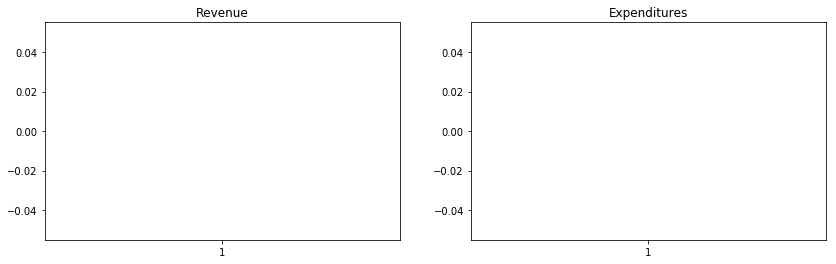

In [56]:
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
plt.boxplot(usedu_df["TOTAL_REVENUE"])
plt.title("Revenue")

plt.subplot(1,2,2)
plt.boxplot(usedu_df.TOTAL_EXPENDITURE)
plt.title("Expenditures")
plt.show()

Text(0.5, 1.0, 'Revenue')

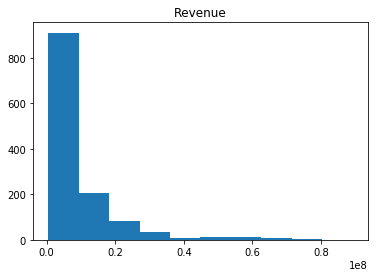

In [14]:
plt.hist(usedu_df["TOTAL_REVENUE"])
plt.title("Revenue")


Text(0.5, 1.0, 'Expenditures')

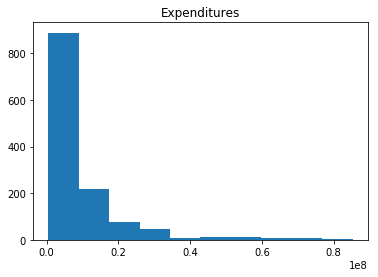

In [16]:
plt.hist(usedu_df.TOTAL_EXPENDITURE)
plt.title("Expenditures")


In [17]:
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [ ]:
usedu_df.total_revenue_log = usedu_df.TOTAL_REVENUE.apply(np.log)
usedu_df.total_expenditure_log = usedu_df.TOTAL_EXPENDITURE.apply(np.log)

In [26]:
#check o outliers
q75, q25 = np.percentile(usedu_df.total_revenue_log, [75 ,25])
iqr = q75 - q25
threshold=1.5
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
print("The score threshold is: {}".format(threshold))
print("Number of outliers is: {}".format(
   len((np.where((usedu_df.total_revenue_log > max_val) 
        | (usedu_df.total_revenue_log < min_val))[0]))
    ))

The score threshold is: 1.5
Number of outliers is: 0


In [25]:
q75, q25 = np.percentile(usedu_df.total_expenditure_log, [75 ,25])
iqr = q75 - q25
threshold= 1.5
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
print("The score threshold is: {}".format(threshold))
print("Number of outliers is: {}".format(
   len((np.where((usedu_df.total_expenditure_log > max_val) 
        | (usedu_df.total_expenditure_log < min_val))[0]))
    ))

The score threshold is: 1.5
Number of outliers is: 0


3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [28]:
usedu_df["net_budget"] = usedu_df["TOTAL_REVENUE"] - usedu_df["TOTAL_EXPENDITURE"]
usedu_df["net_budget"].head()

0     25087.0
1     77103.0
2   -143501.0
3    -31063.0
4   -878807.0
Name: net_budget, dtype: float64

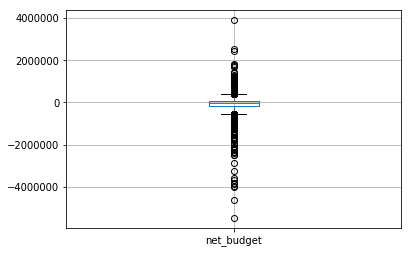

In [31]:
usedu_df.boxplot(column="net_budget")

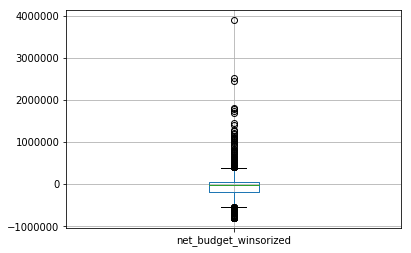

In [40]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
usedu_df["net_budget_winsorized"] = winsorize(usedu_df["net_budget"], limits=.05) #(.05,.95)) shouldn't this do top too?
usedu_df["net_budget_winsorized"]
usedu_df.boxplot(column='net_budget_winsorized')

4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

In [45]:
usedu_df["net_log_budget"] = usedu_df.total_revenue_log - usedu_df.total_expenditure_log

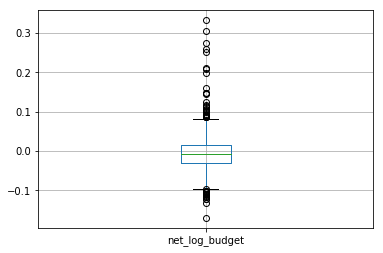

In [46]:
usedu_df.boxplot(column='net_log_budget')

In [ ]:
#add winsorization to net log budget

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [54]:
usedu_df.net_budget_winsorized.describe()

count    1.280000e+03
mean    -4.912632e+04
std      3.705404e+05
min     -8.032080e+05
25%     -1.816858e+05
50%     -2.148400e+04
75%      5.130425e+04
max      3.897129e+06
Name: net_budget_winsorized, dtype: float64

In [53]:
usedu_df.net_log_budget.describe()

count    1280.000000
mean       -0.005898
std         0.044045
min        -0.170369
25%        -0.029241
50%        -0.006391
75%         0.015571
max         0.332627
dtype: float64

log vs not log is quite different...

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

A: subtracted log of dollar seems problematic, since it is equivalent to the log of the ratio of the items. Log wasn't appropriate since the next step was subtracting. Maybe do log transform after creating budget field. 